# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhamad Sugeng Cahyono
- **Email:** muhamadsugengcahyono@gmail.com
- **ID Dicoding:** sugeng_cahyono

## Menentukan Pertanyaan Bisnis



1.   Apakah musim tertentu memiliki dampak signifikan pada jumlah pengguna bike sharing?
2.   Bagaimana pola penggunaan bike sharing berdasarkan tahun, bulan, dan jam?
2.   Bagaimana kondisi cuaca memengaruhi intensitas penggunaan bike sharing?







## Import Semua Packages/Library yang Digunakan

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

tabel day_df

In [54]:
day_df = pd.read_csv("https://raw.githubusercontent.com/sugengcahyono/Bike_Sharing/main/Submission/Data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


tabel hour_df

In [55]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/sugengcahyono/Bike_Sharing/main/Submission/Data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

***Menilai Tabel day_df***

**Cek tipe data**

In [56]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


tabel day_df terdapat kesalahan tipe data pada kolom dteday berupa object yang seharusnya datetime

Cek Missing Value

In [57]:

day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


tabel day_df tidak terdapat missing value

**Cek Duplikasi Data**

In [58]:
print("Jumlah duplikasi:", day_df.duplicated().sum())

Jumlah duplikasi: 0


**Cek parameter statistik**

In [59]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Menilai Tabel hour_df**

**Cek Tipe Data**

In [60]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


 hour_df terdapat kesalahan tipe data pada kolom dteday berupa object yang seharusnya datetime

**Cek missing value**

In [61]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Cek duplikasi data**

In [62]:
print("Jumlah duplikasi:", hour_df.duplicated().sum())

Jumlah duplikasi: 0


**Cek parameter statistik**

In [63]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

**Membersihkan tabel day_df**

Memperbaiki tipe data

In [64]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

Memperbaiki tipe data pada tabel day_df kolom dteday menjadi datetime menggunakan pandas

In [65]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Membersihkan tabel hour_df**

Memperbaiki tipe data

In [66]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

Memperbaiki tipe data pada tabel hour_df kolom dteday menjadi datetime menggunakan pandas

In [67]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

**Explore day_df**

In [68]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
469,470,2012-04-14,2,1,4,0,6,0,1,0.495000,0.487996,0.502917,0.190917,2795,4665,7460
142,143,2011-05-23,2,0,5,0,1,1,2,0.631667,0.590296,0.810000,0.233842,836,3438,4274
392,393,2012-01-28,1,1,1,0,6,0,1,0.315833,0.326379,0.543333,0.210829,775,3248,4023
649,650,2012-10-11,4,1,10,0,4,1,1,0.435000,0.431167,0.463333,0.181596,834,6736,7570
122,123,2011-05-03,2,0,5,0,2,1,2,0.616667,0.582079,0.697083,0.342667,603,3848,4451


**Denormalize**

In [69]:
day_df["temp"] = day_df["temp"].multiply(41)
day_df["atemp"] = day_df["atemp"].multiply(50)
day_df["hum"] = day_df["hum"].multiply(100)
day_df["windspeed"] = day_df["windspeed"].multiply(67)

day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


Mengembalikan data aslinya sebelum di normalisasi untuk di eksplore dan di visualisasi

In [70]:
day_df.loc[day_df["season"] == 1, "season"] = "Springer"
day_df.loc[day_df["season"] == 2, "season"] = "Summer"
day_df.loc[day_df["season"] == 3, "season"] = "Fall"
day_df.loc[day_df["season"] == 4, "season"] = "Winter"

day_df.season.value_counts().sort_index()

<ipython-input-70-e5d51c18157b>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Springer' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[day_df["season"] == 1, "season"] = "Springer"


,count
season,
Fall,188
Springer,181
Summer,184
Winter,178


In [71]:
day_df.loc[day_df["yr"] == 0, "yr"] = "2011"
day_df.loc[day_df["yr"] == 1, "yr"] = "2012"

day_df.yr.value_counts().sort_index()

<ipython-input-71-b6273414a4b5>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2011' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[day_df["yr"] == 0, "yr"] = "2011"


,count
yr,
2011,365
2012,366


In [72]:
day_df.mnth.value_counts().sort_index()

,count
mnth,
1,62
2,57
3,62
4,60
5,62
6,60
7,62
8,62
9,60


In [73]:
day_df.loc[day_df["holiday"] == 0, "holiday"] = "Holiday"
day_df.loc[day_df["holiday"] == 1, "holiday"] = "Not a Holiday"

day_df.holiday.value_counts().sort_index()

<ipython-input-73-c57a4a245124>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Holiday' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[day_df["holiday"] == 0, "holiday"] = "Holiday"


,count
holiday,
Holiday,710
Not a Holiday,21


In [74]:
day_df.loc[day_df["weekday"] == 0, "weekday"] = "Sun"
day_df.loc[day_df["weekday"] == 1, "weekday"] = "Mon"
day_df.loc[day_df["weekday"] == 2, "weekday"] = "Tue"
day_df.loc[day_df["weekday"] == 3, "weekday"] = "Wed"
day_df.loc[day_df["weekday"] == 4, "weekday"] = "Thu"
day_df.loc[day_df["weekday"] == 5, "weekday"] = "Fri"
day_df.loc[day_df["weekday"] == 6, "weekday"] = "Sat"

day_df.weekday.value_counts().sort_index()

<ipython-input-74-11ed0f295efb>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sun' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[day_df["weekday"] == 0, "weekday"] = "Sun"


,count
weekday,
Fri,104
Mon,105
Sat,105
Sun,105
Thu,104
Tue,104
Wed,104


In [75]:
day_df.loc[day_df["workingday"] == 0, "workingday"] = "Holiday"
day_df.loc[day_df["workingday"] == 1, "workingday"] = "Working Day"

day_df.workingday.value_counts().sort_index()

<ipython-input-75-26339ca6e3e0>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Holiday' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[day_df["workingday"] == 0, "workingday"] = "Holiday"


,count
workingday,
Holiday,231
Working Day,500


In [76]:
day_df.loc[day_df["weathersit"] == 1, "weathersit"] = "Clear"
day_df.loc[day_df["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
day_df.loc[day_df["weathersit"] == 3, "weathersit"] = "Light Snow"
day_df.loc[day_df["weathersit"] == 4, "weathersit"] = "Heavy Rain"

day_df.weathersit.value_counts().sort_index()

<ipython-input-76-3c38d057e008>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Clear' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[day_df["weathersit"] == 1, "weathersit"] = "Clear"


,count
weathersit,
Clear,463
Light Snow,21
Mist + Cloudy,247


array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>]], dtype=object)

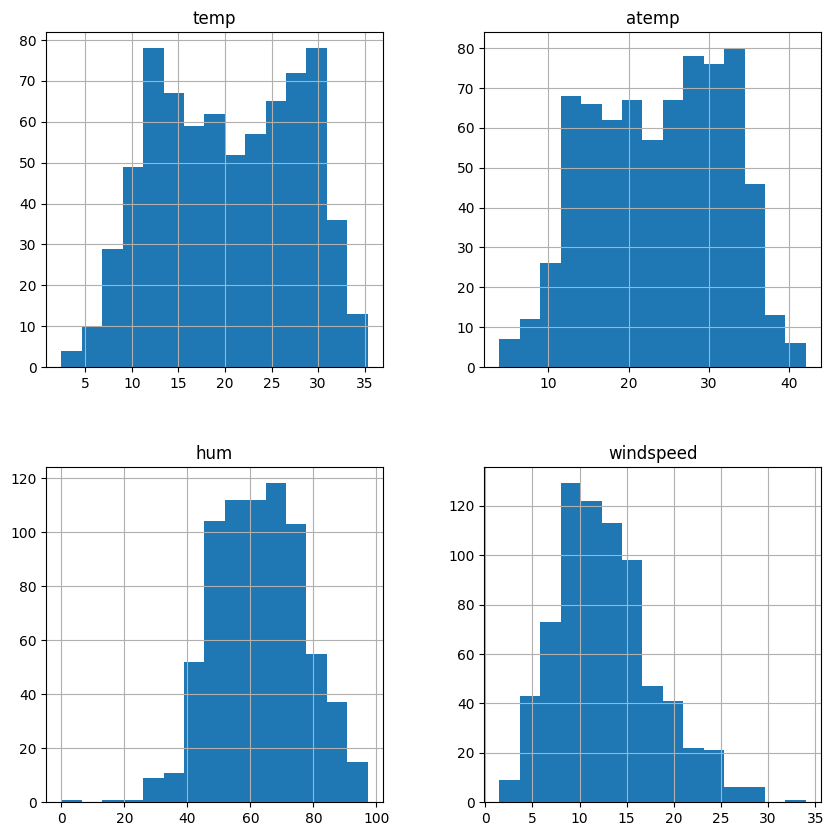

In [77]:
day_num_df = day_df[["temp", "atemp", "hum", "windspeed"]]
day_num_df.hist(bins=15, figsize=(10, 10))

 Pada tabel day_df pada kolom temp bentuk grafik historgramnya adalah left-skewed distribution, pada kolom atemp bentuk grafik histogramnya adalah left-skewed distribution, pada kolom hum bentuk grafik histogramnya adalah right-skewed distribution, dan pada kolom windspeed bentuk grafik historgramnya adalah right-skewed distribution

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

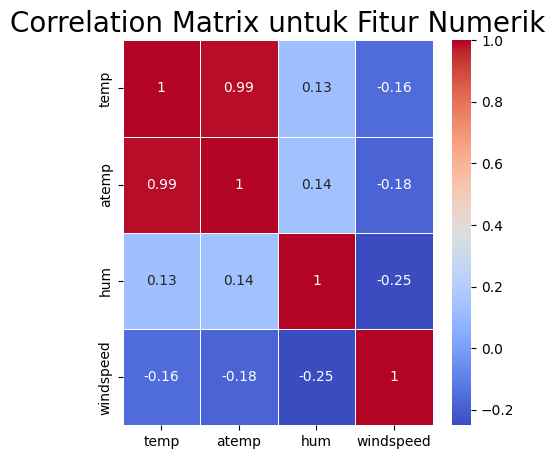

In [78]:
plt.figure(figsize = (5, 5))
correlation_matrix = day_num_df.corr().round(2)

sns.heatmap(data = correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Matrix untuk Fitur Numerik', size = 20)

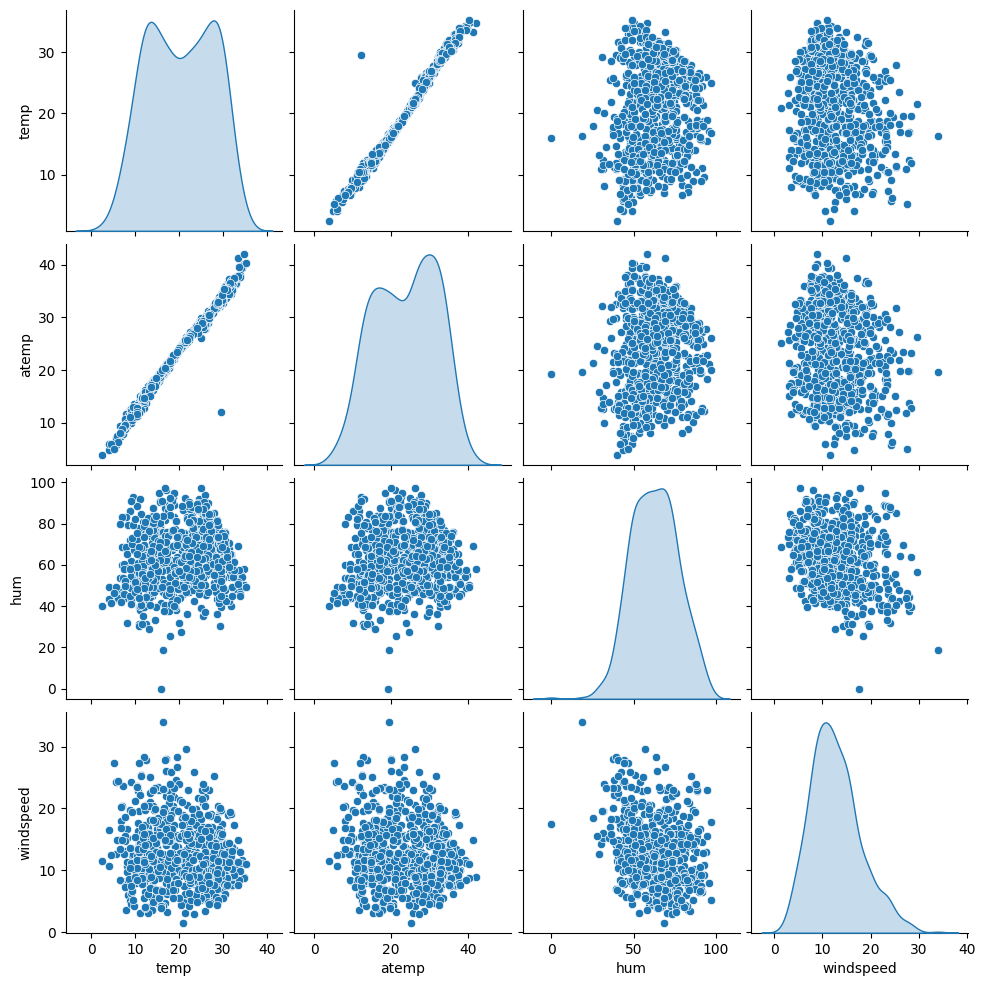

In [79]:
sns.pairplot(data=day_num_df, diag_kind="kde")

pada tabel day_df pada kolom temp dan atemp memiliki korelasi sangat bersesuaian, pada kolom temp dan hum hampir tidak memiliki korelasi, pada kolom temp dan windspeed memiliki korelasi yang cukup berlawanan, pada kolom atemp dan hum hampir tidak memiliki korelasi, pada kolom atemp dan windspeed memiliki korelasi cukup berlawanan, pada kolom hum dan windspeed memiliki korelasi cukup berlawanan

**Explore hour_df**

In [80]:
hour_df.hr.value_counts().sort_index()

,count
hr,
0,726
1,724
2,715
3,697
4,697
5,717
6,725
7,727
8,727


In [81]:
hour_df.loc[hour_df["weathersit"] == 1, "weathersit"] = "Clear"
hour_df.loc[hour_df["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
hour_df.loc[hour_df["weathersit"] == 3, "weathersit"] = "Light Snow"
hour_df.loc[hour_df["weathersit"] == 4, "weathersit"] = "Heavy Rain"

hour_df.weathersit.value_counts().sort_index()

<ipython-input-81-76628093e647>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Clear' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hour_df.loc[hour_df["weathersit"] == 1, "weathersit"] = "Clear"


,count
weathersit,
Clear,11413
Heavy Rain,3
Light Snow,1419
Mist + Cloudy,4544


## Visualization & Explanatory Analysis

In [95]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
424,425,2012-02-29,Springer,2012,2,Holiday,Wed,Working Day,Mist + Cloudy,14.118268,17.42350,80.4783,12.000839,65,1769,1834
354,355,2011-12-21,Springer,2011,12,Holiday,Wed,Working Day,Mist + Cloudy,17.561653,21.40085,85.8333,14.833800,107,2553,2660
510,511,2012-05-25,Summer,2012,5,Holiday,Fri,Working Day,Clear,27.880000,31.37645,74.7083,9.416850,1417,5317,6734
0,1,2011-01-01,Springer,2011,1,Holiday,Sat,Holiday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
459,460,2012-04-04,Summer,2012,4,Holiday,Wed,Working Day,Clear,22.208347,26.67250,46.9583,12.125325,1058,5378,6436


## Apakah musim tertentu memiliki dampak signifikan pada jumlah pengguna bike sharing?

In [97]:

byseason_df = day_df.groupby(by="season").agg({
    "cnt": "sum"
}).reset_index()


byseason_df.rename(columns={"cnt": "sum"}, inplace=True)

byseason_df


,season,sum
0,Fall,1061129
1,Springer,471348
2,Summer,918589
3,Winter,841613


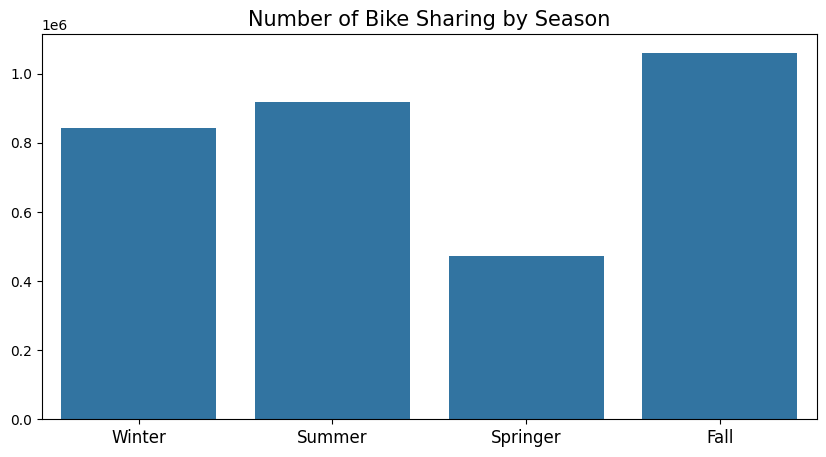

In [98]:

plt.figure(figsize=(10, 5))  # Ukuran figure

sns.barplot(
    y="sum",
    x="season",
    data=byseason_df.sort_values(by="season", ascending=False),
)


plt.title("Number of Bike Sharing by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)


plt.show()


## Seperti apa pola penggunaan bike sharing berdasarkan tahun, bulan, dan jam?

**Tahun**

In [103]:

byyr_df = day_df.groupby(by="yr").agg({
    "cnt": "sum"
}).reset_index()


byyr_df.rename(columns={"cnt": "sum"}, inplace=True)

byyr_df


,yr,sum
0,2011,1243103
1,2012,2049576


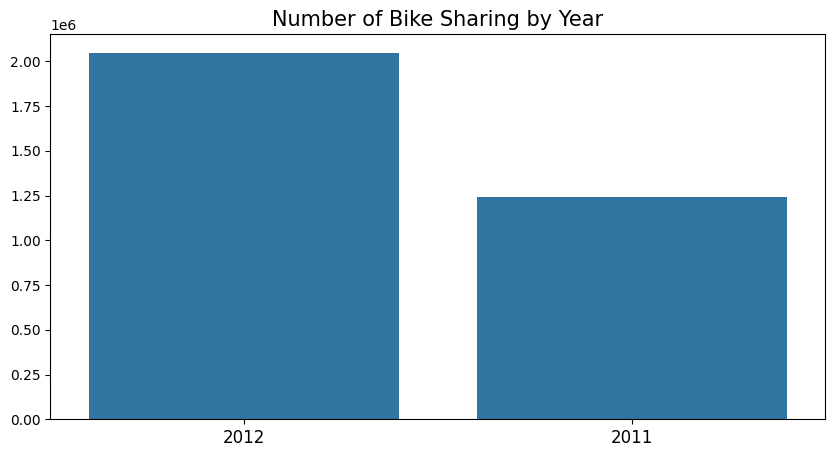

In [104]:

plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="yr",
    data=byyr_df.sort_values(by="yr", ascending=False),
)

plt.title("Number of Bike Sharing by Year", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)


plt.show()


**Bulan**

Total Penggunaan Bike Sharing Berdasarkan Bulan:
    mnth     sum
0      1  134933
1      2  151352
2      3  228920
3      4  269094
4      5  331686
5      6  346342
6      7  344948
7      8  351194
8      9  345991
9     10  322352
10    11  254831
11    12  211036


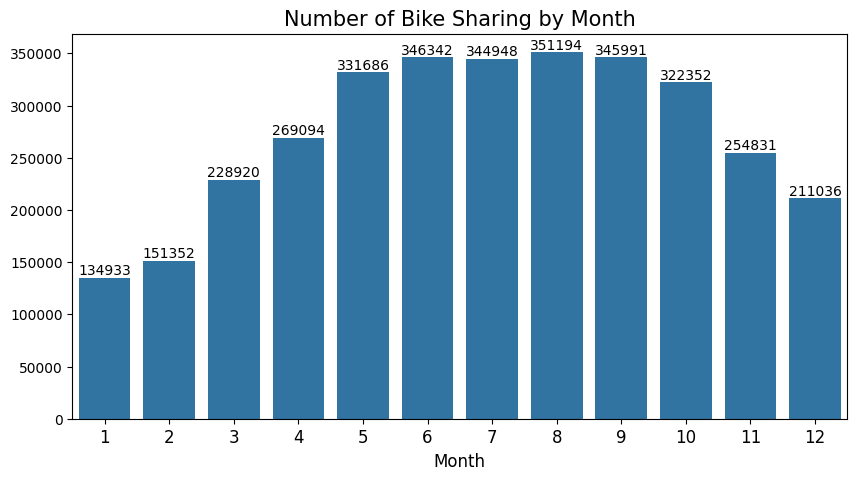

In [106]:

bymonth_df = day_df.groupby(by="mnth").agg({
    "cnt": "sum"
}).reset_index()


bymonth_df.rename(columns={"cnt": "sum"}, inplace=True)


print("Total Penggunaan Bike Sharing Berdasarkan Bulan:")
print(bymonth_df)


plt.figure(figsize=(10, 5))
sns.barplot(
    y="sum",
    x="mnth",
    data=bymonth_df.sort_values(by="mnth", ascending=True),
)


for index, row in bymonth_df.iterrows():
    plt.text(row['mnth'] - 1, row['sum'], f"{int(row['sum'])}", ha="center", va="bottom", fontsize=10)

plt.title("Number of Bike Sharing by Month", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Month", fontsize=12)
plt.tick_params(axis="x", labelsize=12)
plt.show()


**Jam**

In [113]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
13122,13123,2012-07-05,3,1,7,23,0,4,1,Clear,0.80,0.7576,0.55,0.1642,32,99,131
746,747,2011-02-03,1,0,2,12,0,4,1,Clear,0.20,0.1818,0.40,0.3582,2,67,69
15228,15229,2012-10-01,4,1,10,17,0,1,1,Light Snow,0.56,0.5303,0.60,0.2537,65,791,856
8520,8521,2011-12-26,1,0,12,18,1,1,0,Clear,0.32,0.3333,0.49,0.0896,21,54,75
7043,7044,2011-10-26,4,0,10,2,0,3,1,Clear,0.44,0.4394,0.67,0.1642,2,1,3


Total Penggunaan Bike Sharing Berdasarkan Jam:
    hr     sum
0    0   39130
1    1   24164
2    2   16352
3    3    8174
4    4    4428
5    5   14261
6    6   55132
7    7  154171
8    8  261001
9    9  159438
10  10  126257
11  11  151320
12  12  184414
13  13  184919
14  14  175652
15  15  183149
16  16  227748
17  17  336860
18  18  309772
19  19  226789
20  20  164550
21  21  125445
22  22   95612
23  23   63941


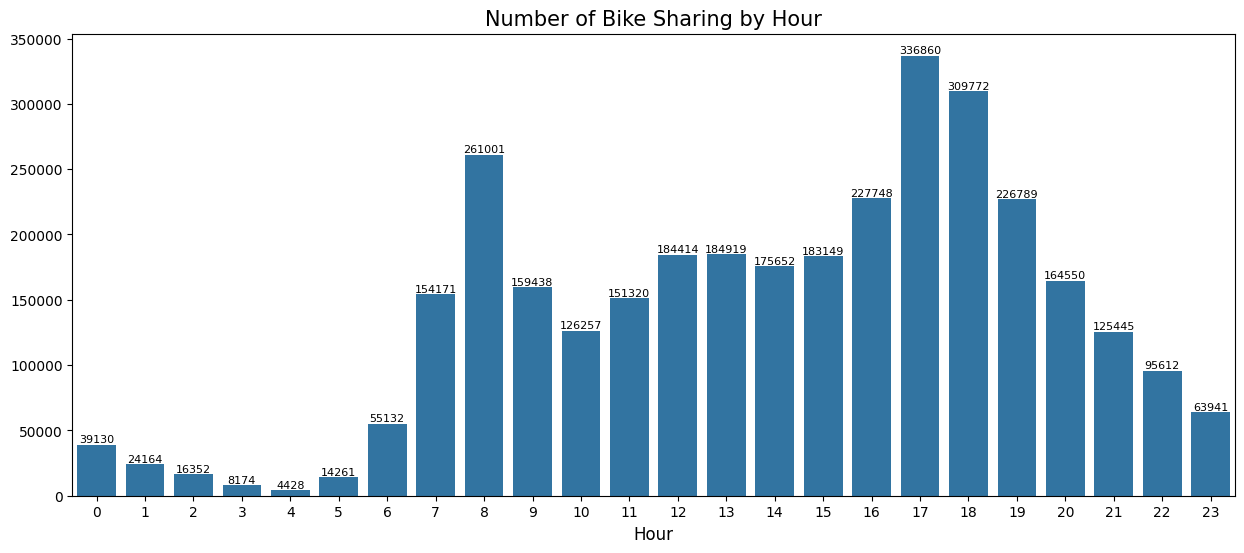

In [109]:

byhour_df = hour_df.groupby(by="hr").agg({
    "cnt": "sum"
}).reset_index()


byhour_df.rename(columns={"cnt": "sum"}, inplace=True)


print("Total Penggunaan Bike Sharing Berdasarkan Jam:")
print(byhour_df)


plt.figure(figsize=(15, 6))
sns.barplot(
    y="sum",
    x="hr",
    data=byhour_df.sort_values(by="hr", ascending=True),
)


for index, row in byhour_df.iterrows():
    plt.text(row['hr'], row['sum'], f"{int(row['sum'])}", ha="center", va="bottom", fontsize=8)

plt.title("Number of Bike Sharing by Hour", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Hour", fontsize=12)
plt.tick_params(axis="x", labelsize=10)
plt.show()


## Bagaimana kondisi cuaca memengaruhi intensitas penggunaan bike sharing?

Total Penggunaan Bike Sharing Berdasarkan Cuaca:
      weathersit      sum
0          Clear  2257952
1     Light Snow    37869
2  Mist + Cloudy   996858


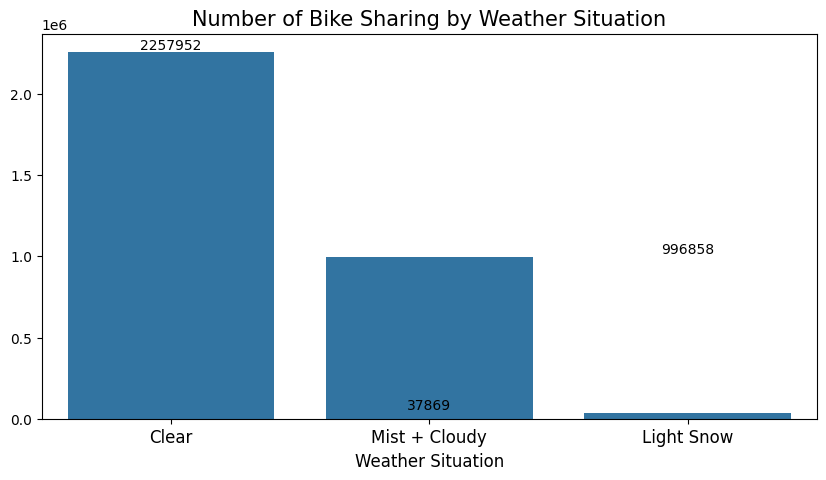

In [111]:

byweather_df = day_df.groupby(by="weathersit").agg({
    "cnt": "sum"
}).reset_index()


byweather_df.rename(columns={"cnt": "sum"}, inplace=True)


print("Total Penggunaan Bike Sharing Berdasarkan Cuaca:")
print(byweather_df)


plt.figure(figsize=(10, 5))
sns.barplot(
    y="sum",
    x="weathersit",
    data=byweather_df.sort_values(by="sum", ascending=False),
)


for index, row in byweather_df.iterrows():
    plt.text(index, row['sum'], f"{int(row['sum'])}", ha="center", va="bottom", fontsize=10)

plt.title("Number of Bike Sharing by Weather Situation", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Weather Situation", fontsize=12)
plt.tick_params(axis="x", labelsize=12)
plt.show()


## Conclusion



1.   Apakah musim tertentu memiliki dampak signifikan pada jumlah pengguna bike sharing?

*   Fall	1061129.
Menunjukkan jumlah pengguna yang paling tinggi, yang mungkin disebabkan oleh kondisi cuaca yang lebih bersahabat dibandingkan dengan musim-musim lain, seperti suhu yang nyaman dan sedikit hujan.
*   Springer	471348. Menunjukkan angka yang cukup tinggi, meskipun lebih rendah dibandingkan Fall. Hal ini bisa dipengaruhi oleh tingginya suhu yang dapat membuat bersepeda terasa lebih melelahkan, meskipun musim panas seringkali merupakan waktu liburan dan lebih banyak orang mencari kegiatan luar ruangan.
*   Summer	918589. Menunjukkan angka yang cukup tinggi, meskipun lebih rendah dibandingkan Fall. Hal ini bisa dipengaruhi oleh tingginya suhu yang dapat membuat bersepeda terasa lebih melelahkan, meskipun musim panas seringkali merupakan waktu liburan dan lebih banyak orang mencari kegiatan luar ruangan.
*   Winter	841613. Memiliki jumlah pengguna yang lebih rendah, yang mungkin disebabkan oleh kondisi cuaca yang kurang mendukung. Di musim dingin, suhu yang rendah dan cuaca yang tidak menentu dapat mengurangi kenyamanan bersepeda. Musim semi, meskipun lebih nyaman, mungkin masih mengalami cuaca yang tidak menentu atau hujan, yang mengurangi ketertarikan untuk bersepeda.

2.   Seperti apa pola penggunaan bike sharing berdasarkan tahun, bulan, dan jam?


*   Tahun 2011 = 1243103
*   Tahun 2012 = 2049576
*   Pada 2012, jumlah pengguna bike sharing jauh lebih tinggi dibandingkan 2011. Ini mungkin menunjukkan peningkatan minat terhadap layanan bike sharing seiring dengan waktu, yang bisa disebabkan oleh faktor-faktor seperti peningkatan kesadaran akan lingkungan, infrastruktur yang lebih baik, atau faktor sosial dan ekonomi.


*   Bulan Mei hingga Agustus menunjukkan puncak penggunaan dengan jumlah pengguna yang sangat tinggi, terutama pada bulan Agustus (351,194 pengguna). Ini kemungkinan besar disebabkan oleh cuaca yang lebih baik (musim panas) dan liburan sekolah atau kerja.
*   Bulan-bulan musim dingin (Desember hingga Februari) menunjukkan penurunan yang signifikan dalam jumlah pengguna, terutama pada bulan Januari (134,933 pengguna). Hal ini mungkin disebabkan oleh cuaca yang kurang mendukung untuk bersepeda.


*   Puncak penggunaan terjadi antara jam 7 hingga 9 pagi (154,171 pengguna pada jam 7 dan 261,001 pengguna pada jam 8). Ini mungkin berhubungan dengan orang-orang yang menggunakan sepeda untuk pergi bekerja atau sekolah pada jam-jam sibuk pagi hari.
*   Penggunaan juga meningkat pada sore hari, terutama antara jam 16:00 hingga 18:00 (227,748 pada jam 16, 336,860 pada jam 17, dan 309,772 pada jam 18). Ini menunjukkan bahwa banyak orang menggunakan bike sharing setelah jam kerja atau sekolah, kemungkinan besar untuk keperluan rekreasi atau perjalanan pulang.
*   Penggunaan rendah terjadi pada dini hari (jam 0 hingga 4), yang dapat dipahami karena pada jam tersebut, aktivitas bersepeda cenderung rendah.




3.   Bagaimana kondisi cuaca memengaruhi intensitas penggunaan bike sharing?



*   Clear  2257952. Dengan jumlah pengguna mencapai 2,257,952, kondisi cuaca cerah adalah yang paling mendukung bagi penggunaan bike sharing. Ini menunjukkan bahwa orang lebih cenderung menggunakan sepeda ketika cuaca baik dan cerah, yang memudahkan aktivitas luar ruangan seperti bersepeda.
*   Light Snow    37869. Penggunaan bike sharing pada kondisi salju ringan sangat rendah dengan hanya 37,869 pengguna. Salju dapat membuat jalan menjadi licin dan berbahaya, sehingga mengurangi minat orang untuk bersepeda. Ini menjelaskan mengapa jumlah pengguna bike sharing sangat rendah dalam kondisi salju ringan.
*   Mist + Cloudy   996858. Meskipun kondisi ini cenderung kurang ideal dibandingkan cuaca cerah, penggunaan bike sharing tetap cukup tinggi dengan jumlah pengguna mencapai 996,858. Ini menunjukkan bahwa meskipun cuaca tidak sepenuhnya cerah, banyak orang tetap menggunakan bike sharing, mungkin karena kondisi cuaca tersebut masih cukup nyaman untuk beraktivitas.











## Export Dataset

In [114]:
day_df.to_csv("day_clean.csv", index=False)
hour_df.to_csv("hour_clean.csv", index=False)